In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
dataset = pd.read_csv("../data.csv")

In [3]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

In [5]:
num_pixels = X.shape[1]
num_pixels

1024

In [6]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [7]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)
X_images.shape

(92000, 32, 32)

In [8]:
X_test.shape

NameError: name 'X_test' is not defined

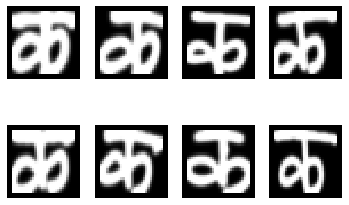

In [49]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [38]:
dataset.iloc[:,1024].value_counts()

character_06_cha             2000
character_04_gha             2000
character_03_ga              2000
character_31_petchiryakha    2000
character_23_ba              2000
character_05_kna             2000
character_29_waw             2000
character_14_dhaa            2000
character_24_bha             2000
digit_0                      2000
character_25_ma              2000
digit_3                      2000
character_08_ja              2000
digit_6                      2000
digit_1                      2000
character_07_chha            2000
character_13_daa             2000
character_26_yaw             2000
character_17_tha             2000
digit_4                      2000
character_20_na              2000
character_19_dha             2000
character_16_tabala          2000
character_15_adna            2000
character_27_ra              2000
digit_5                      2000
character_36_gya             2000
character_33_ha              2000
character_22_pha             2000
character_32_p

In [39]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

(array([], dtype=int64),)

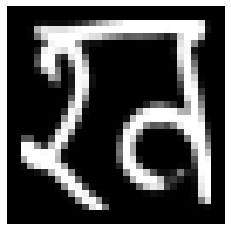

In [40]:
plt.imshow(X_images[2000], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [50]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y_d = dataset.iloc[:,-1]

In [51]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)


In [52]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [53]:
X = X / 255

In [54]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [59]:
X_train.iloc[0]

pixel_0000    0.0
pixel_0001    0.0
pixel_0002    0.0
pixel_0003    0.0
pixel_0004    0.0
             ... 
pixel_1019    0.0
pixel_1020    0.0
pixel_1021    0.0
pixel_1022    0.0
pixel_1023    0.0
Name: 4002, Length: 1024, dtype: float64

In [60]:
32*32

1024

In [29]:
import tensorflow as tf

In [30]:
def baseline_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [17]:
model = baseline_model()

epochs = 10
batch_size = 400
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/10
58880/58880 - 3s - loss: 1.2389 - accuracy: 0.6763 - val_loss: 0.7726 - val_accuracy: 0.7942
Epoch 2/10
58880/58880 - 2s - loss: 0.5785 - accuracy: 0.8478 - val_loss: 0.5121 - val_accuracy: 0.8641
Epoch 3/10
58880/58880 - 2s - loss: 0.3651 - accuracy: 0.9067 - val_loss: 0.3960 - val_accuracy: 0.8931
Epoch 4/10
58880/58880 - 2s - loss: 0.2552 - accuracy: 0.9353 - val_loss: 0.3430 - val_accuracy: 0.9043
Epoch 5/10
58880/58880 - 2s - loss: 0.1863 - accuracy: 0.9544 - val_loss: 0.3032 - val_accuracy: 0.9151
Epoch 6/10
58880/58880 - 2s - loss: 0.1377 - accuracy: 0.9685 - val_loss: 0.2815 - val_accuracy: 0.9219
Epoch 7/10
58880/58880 - 2s - loss: 0.1044 - accuracy: 0.9777 - val_loss: 0.2543 - val_accuracy: 0.9286
Epoch 8/10
58880/58880 - 2s - loss: 0.0744 - accuracy: 0.9866 - val_loss: 0.2507 - val_accuracy: 0.9296
Epoch 9/10
58880/58880 - 1s - loss: 0.0557 - accuracy: 0.9914 - val_loss: 0.2405 - val_accuracy: 0.9330
Epoch 10/10
58

In [18]:
model.evaluate(X_test,y_test)

18400/18400 [==============================] - 2s 114us/sample - loss: 0.2460 - accuracy: 0.9334


[0.24598273884667002, 0.9333696]

In [32]:
model = tf.keras.models.load_model('../model/model.h5')

KeyboardInterrupt: 

In [62]:
X_test.shape

(18400, 1024)

In [19]:
y_pred = model.predict(X_test)

In [20]:
binencoder.inverse_transform(y_pred)

array(['digit_5', 'character_12_thaa', 'character_22_pha', ...,
       'character_11_taamatar', 'character_03_ga', 'character_36_gya'],
      dtype='<U25')

In [21]:
binencoder.inverse_transform(y_test)

array(['digit_5', 'character_12_thaa', 'character_22_pha', ...,
       'character_11_taamatar', 'character_03_ga', 'character_36_gya'],
      dtype='<U25')

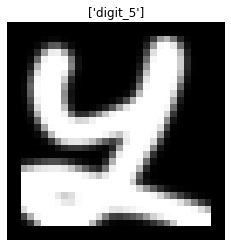

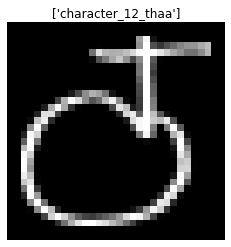

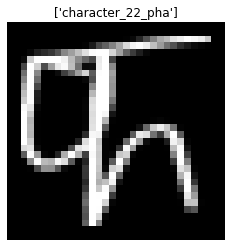

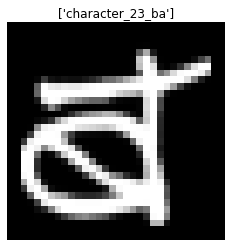

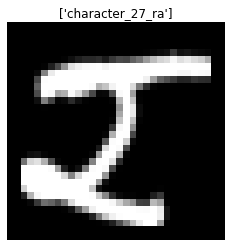

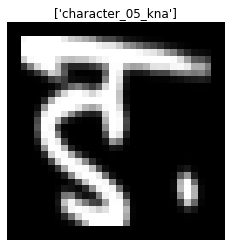

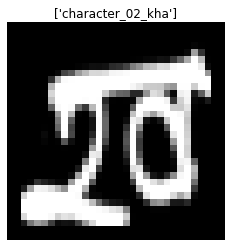

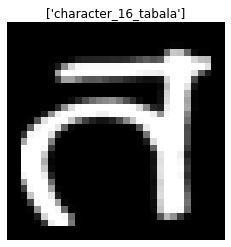

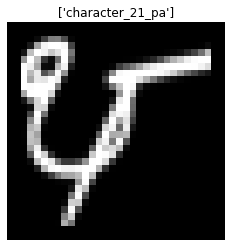

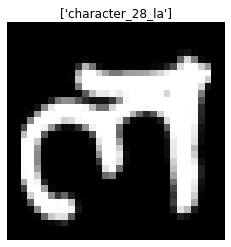

In [22]:
for i in range(10):
    plt.imshow(X_test.iloc[i].values.reshape(img_width, img_height), cmap=plt.get_cmap('gray'))
    plt.title(binencoder.inverse_transform(y_pred[[i]]))
    plt.axis('off')
    plt.show()

In [23]:
binencoder.inverse_transform(y_pred[[0]])

array(['digit_5'], dtype='<U25')

In [24]:
model.save('model.h5')